Fair's Extramarital Affairs Data
Description

Infidelity data, known as Fair's Affairs. Cross-section data from a survey conducted by Psychology Today in 1969. 
References

Greene, W.H. (2003). Econometric Analysis, 5th edition. Upper Saddle River, NJ: Prentice Hall.

Fair, R.C. (1978). A Theory of Extramarital Affairs. Journal of Political Economy, 86, 45–61. 


In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data_path = "Affairs.csv"  # Replace with your actual file path
df = pd.read_csv(data_path)

def analyze_affairs_data(df):
    """
    Analyze factors contributing to affairs using multiple approaches
    """
    # Create binary variable for having affairs or not
    df['had_affair'] = (df['affairs'] > 0).astype(int)
    
    # Basic OLS regression
    X = df[['age', 'yearsmarried', 'religiousness', 'education', 'occupation', 'rating']]
    X = sm.add_constant(X)
    y = df['had_affair']
    
    model = sm.Logit(y, X)
    results = model.fit()
    
    # Create summary statistics by affairs status
    summary_stats = df.groupby('had_affair').agg({
        'age': ['mean', 'std'],
        'yearsmarried': ['mean', 'std'],
        'religiousness': ['mean', 'std'],
        'education': ['mean', 'std'],
        'occupation': ['mean', 'std'],
        'rating': ['mean', 'std']
    })
    
    # Fix the crosstab by explicitly specifying index and columns
    children_crosstab = pd.crosstab(index=df['had_affair'], columns=df['children'])
    gender_crosstab = pd.crosstab(index=df['had_affair'], columns=df['gender'])
    
    return results, summary_stats, children_crosstab, gender_crosstab

Optimization terminated successfully.
         Current function value: 0.510124
         Iterations 6
Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                  601
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            6
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                 0.09211
Time:                        10:56:12   Log-Likelihood:                -306.58
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 1.601e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3262      0.854      1.553      0.120      -0.347    

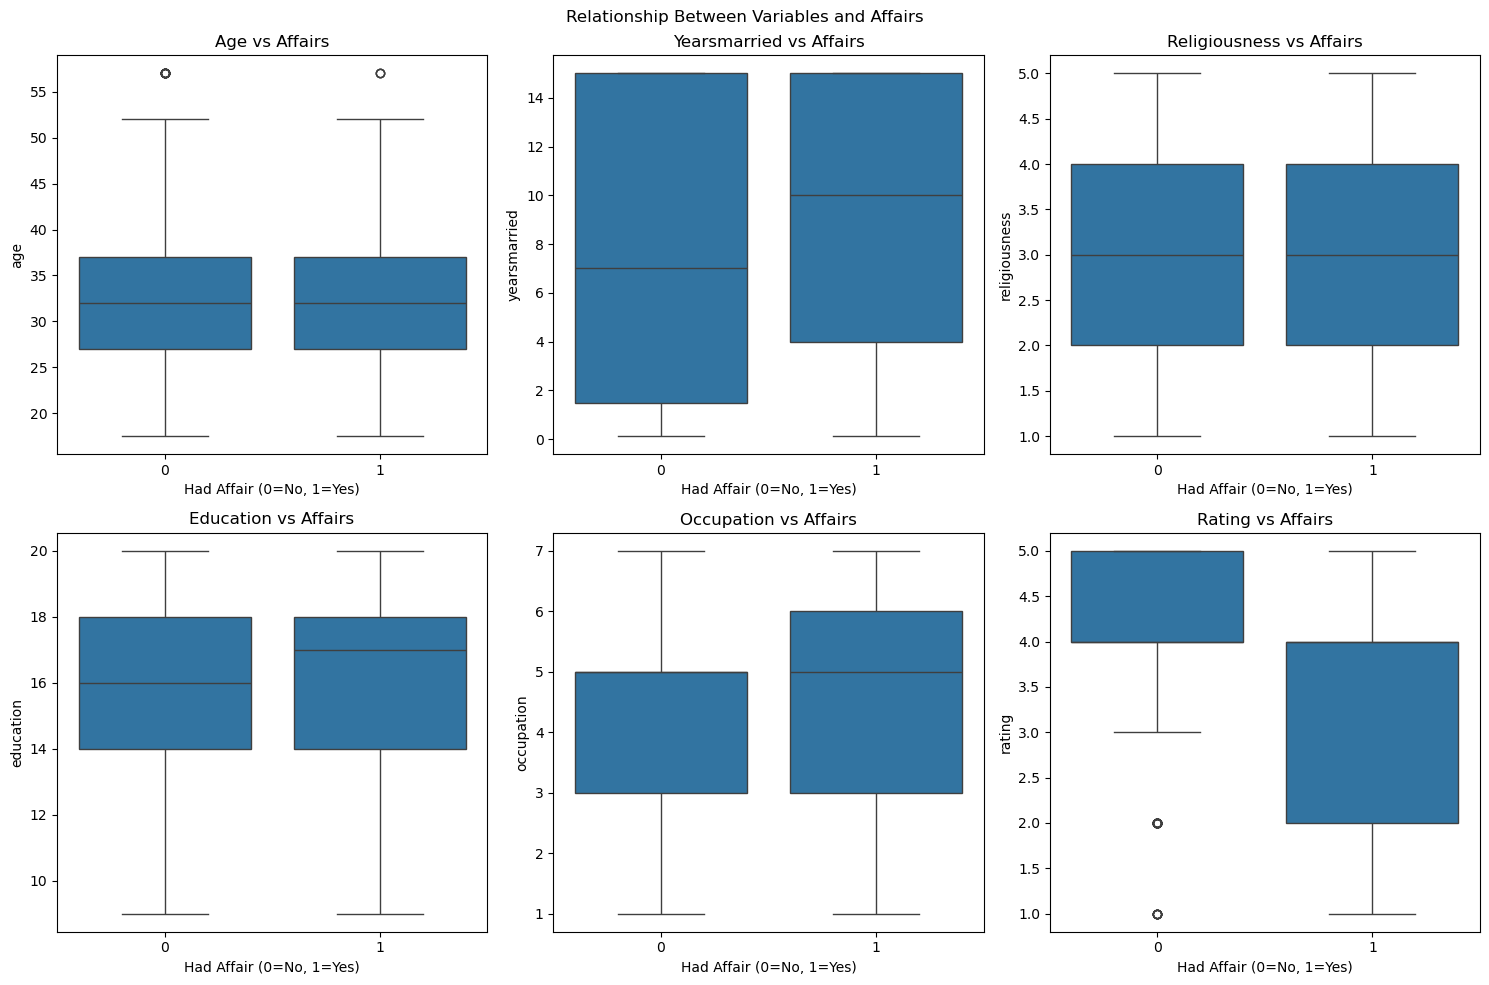

In [13]:
def plot_relationships(df):
    """
    Create visualizations of key relationships
    """
    df['had_affair'] = (df['affairs'] > 0).astype(int)
    
    # Set up the figure
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Relationship Between Variables and Affairs')
    
    # Create box plots for key variables
    variables = ['age', 'yearsmarried', 'religiousness', 'education', 'occupation', 'rating']
    for idx, var in enumerate(variables):
        row = idx // 3
        col = idx % 3
        sns.boxplot(x='had_affair', y=var, data=df, ax=axes[row, col])
        axes[row, col].set_xlabel('Had Affair (0=No, 1=Yes)')
        axes[row, col].set_title(f'{var.capitalize()} vs Affairs')
    
    plt.tight_layout()
    return fig

# Run the analysis
results, summary_stats, children_crosstab, gender_crosstab = analyze_affairs_data(df)

# Print results
print("Logistic Regression Results:")
print(results.summary())
print("\nSummary Statistics by Affairs Status:")
print(summary_stats)
print("\nChildren Cross Tabulation:")
fig = plot_relationships(df)
plt.show()
